# K Means Clustering

# Import Primary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Iris Dataset

In [2]:
df=sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Drop Species

In [4]:
df=df.drop("species",axis=1)

In [5]:
df=df.sample(frac=1)

# Apply PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca=PCA(n_components=2)

In [8]:
dft=pca.fit_transform(df)

In [9]:
dft

array([[ 1.39018886, -0.28266094],
       [-2.59000631,  0.22904384],
       [ 0.33193448, -0.21265468],
       [ 1.19900111, -0.60609153],
       [-2.50694709,  0.6450689 ],
       [ 1.22069088,  0.40761959],
       [ 0.51169856, -0.10398124],
       [ 2.42781791,  0.37819601],
       [ 0.64257601,  0.01773819],
       [ 0.64166908, -0.41824687],
       [ 0.93248853,  0.31833364],
       [ 3.23067366,  1.37416509],
       [ 1.33202444,  0.24444088],
       [ 0.46480029, -0.67071154],
       [-2.68412563,  0.31939725],
       [-2.20948924,  0.43666314],
       [ 1.30079171, -0.76114964],
       [-2.78610927, -0.235112  ],
       [-2.28085963,  0.74133045],
       [-2.62523805,  0.59937002],
       [ 1.34616358, -0.77681835],
       [ 0.71485333,  0.14905594],
       [-2.40561449,  0.18887143],
       [ 2.93258707,  0.3555    ],
       [-2.71414169, -0.17700123],
       [ 1.38876613, -0.20439933],
       [ 0.29900084, -0.34889781],
       [ 1.08810326,  0.07459068],
       [-2.83946217,

Text(0.5, 1.0, 'Groups of Species')

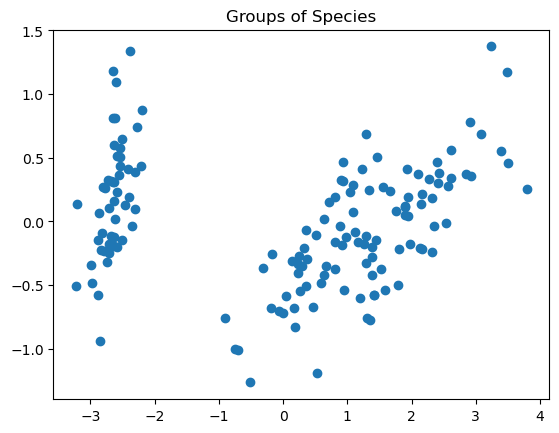

In [10]:
plt.scatter(dft[:,0],dft[:,1])
plt.title("Groups of Species")

# Use the Model

In [11]:
from sklearn.cluster import KMeans

In [12]:
lst=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(dft)
    lst.append(model.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [13]:
lst

[666.165955640561,
 137.15530112818402,
 63.819942022001165,
 42.25903780942156,
 33.48023506321644,
 26.129593549195864,
 22.046876363267405,
 17.924781489430252,
 15.930661133215166]

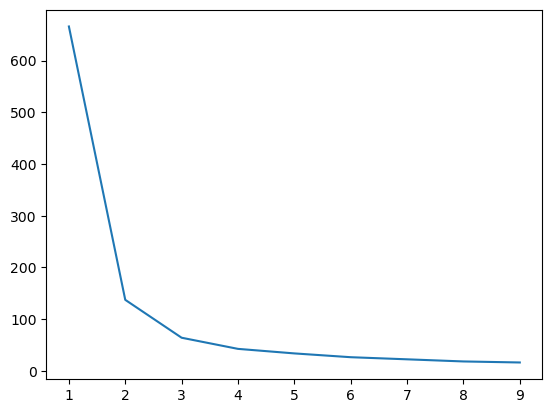

In [14]:
plt.plot(range(1,10),lst)

In [15]:
model=KMeans(n_clusters=3,init="k-means++")

In [16]:
y_labels=model.fit_predict(dft)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Groups of Species')

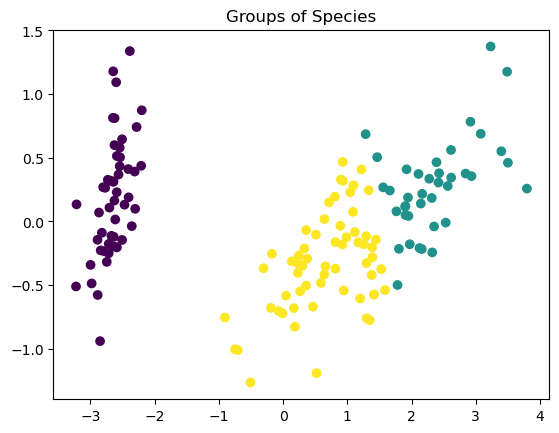

In [17]:
plt.scatter(dft[:,0],dft[:,1],c=y_labels)
plt.title("Groups of Species")

# Hirearchy Clustering

In [18]:
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Eucledian Distance')

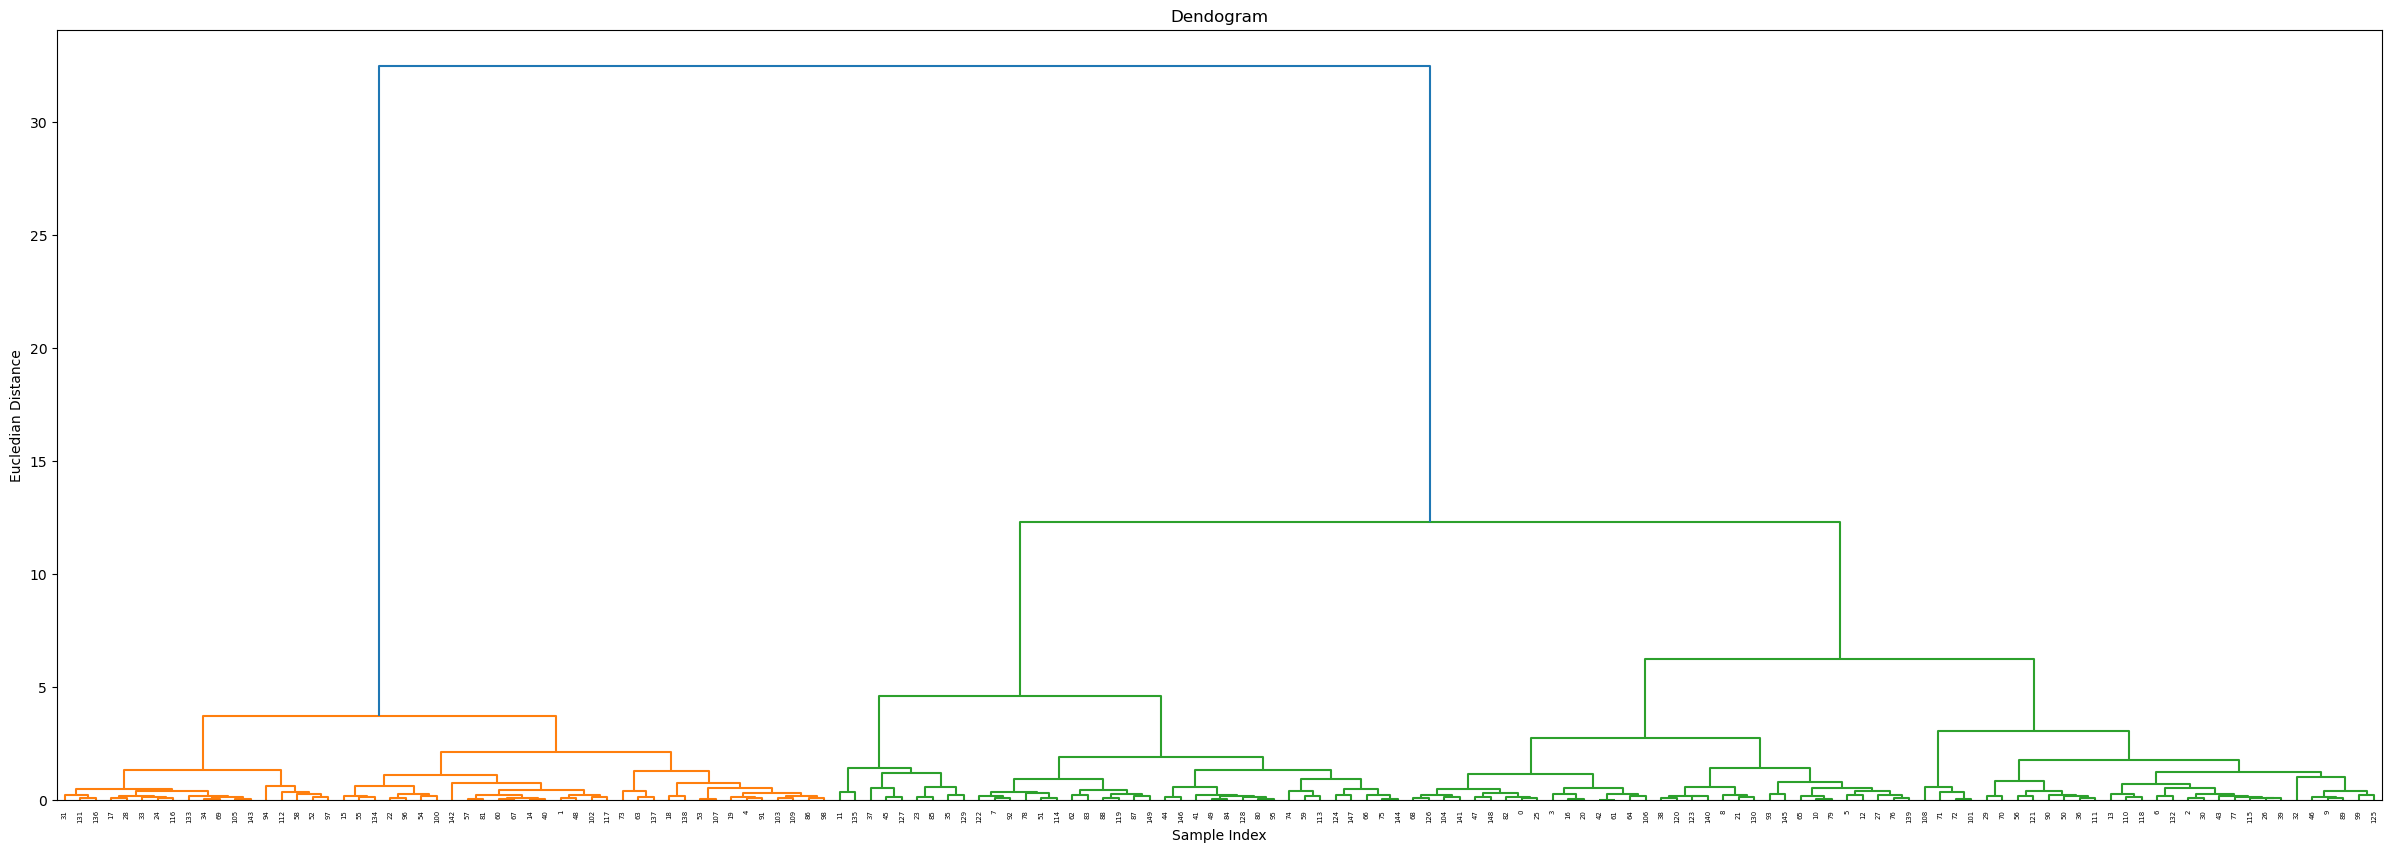

In [19]:
plt.figure(figsize=(30,10))
sc.dendrogram(sc.linkage(dft,method="ward"))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

## Observations:
- We have an option to divide the data into 3 or even 6 labels

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
model=AgglomerativeClustering(n_clusters=6)

In [28]:
y_labels=model.fit_predict(dft)

Text(0.5, 1.0, 'Groups of Species')

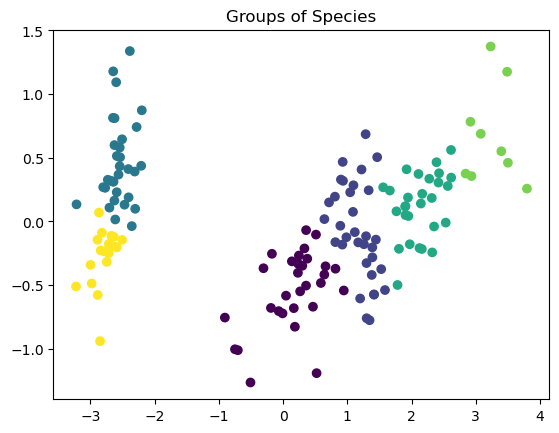

In [29]:
plt.scatter(dft[:,0],dft[:,1],c=y_labels)
plt.title("Groups of Species")